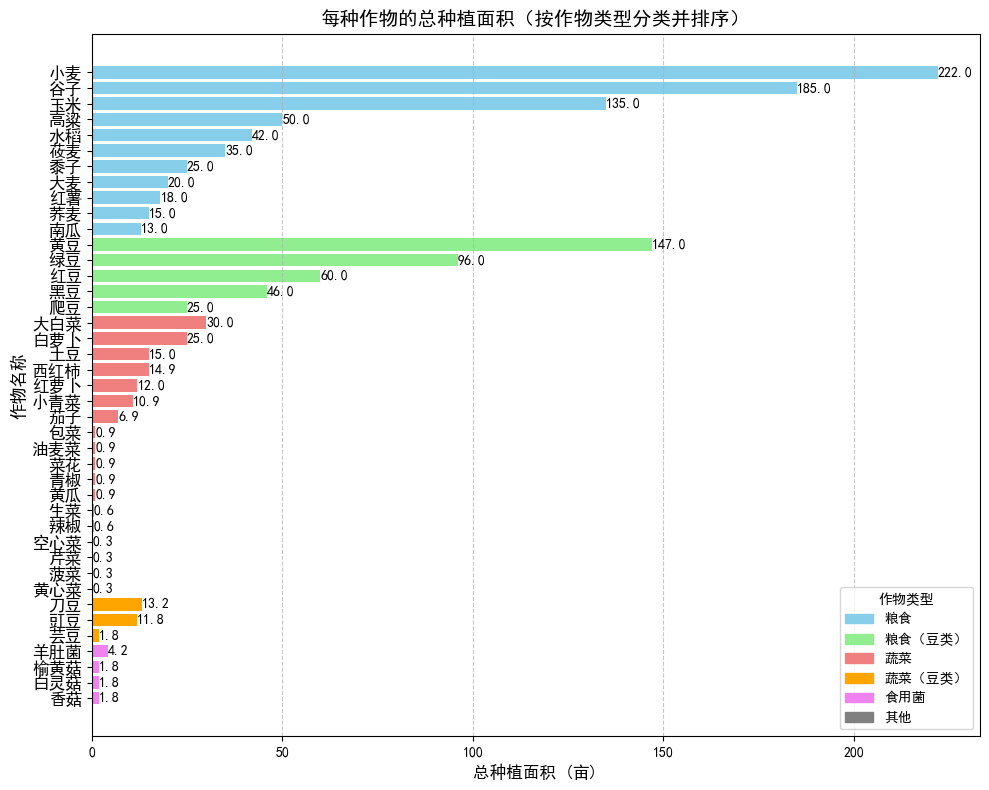

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 读取Excel文件
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 数据输入
df = pd.read_excel("C:/Users/JngyEn/Downloads/2024/C题/种植面积.xlsx", sheet_name='Sheet1')
# 清洗作物名称，去除空格等格式问题
df['作物名称'] = df['作物名称'].str.strip()
df['作物类型'] = df['作物类型'].str.strip()

# 按照作物名称和作物类型分组，并统计种植面积的总和
crop_area_summary = df.groupby(['作物类型', '作物名称'])['种植面积/亩'].sum().reset_index()

# 按照作物类型升序和种植面积降序排序
crop_area_summary = crop_area_summary.sort_values(by=['作物类型', '种植面积/亩'], ascending=[True, False])

# 定义不同作物类型的颜色
colors = {
    '粮食': 'skyblue',
    '粮食（豆类）': 'lightgreen',
    '蔬菜': 'lightcoral',
    '蔬菜（豆类）': 'orange',
    '食用菌': 'violet'
}

# 为每种作物类型分配颜色
crop_area_summary['颜色'] = crop_area_summary['作物类型'].map(colors)

# 处理缺失的颜色，设置默认颜色
default_color = 'gray'
crop_area_summary['颜色'] = crop_area_summary['颜色'].fillna(default_color)

# 反转数据顺序，使得y轴和图例保持一致的阅读顺序
crop_area_summary = crop_area_summary[::-1]

# 绘制横向柱状图
plt.figure(figsize=(10, 8))
bars = plt.barh(crop_area_summary['作物名称'], crop_area_summary['种植面积/亩'], color=crop_area_summary['颜色'])

# 在每个柱子旁边标注种植面积数值
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.1f}', va='center', ha='left', fontsize=10)

# 设置作物名称标签的字体大小
plt.yticks(fontsize=12)

# 设置横轴和纵轴的标签字体大小
plt.ylabel('作物名称', fontsize=12)
plt.xlabel('总种植面积 (亩)', fontsize=12)
plt.title('每种作物的总种植面积（按作物类型分类并排序）', fontsize=14)

# 为背景添加竖线
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 创建颜色说明
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
legend_patches.append(mpatches.Patch(color=default_color, label='其他'))

# 显示图例
plt.legend(handles=legend_patches, title="作物类型", loc='lower right')

# 调整布局和显示
plt.tight_layout()
plt.show()
